# 毕业论文`GRAD`
## 由于原验证结果偏差较大，使用多种手段尝试降低偏差

---
*@author: Evan*\
*@date: 2024-03-30*

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import sys
sys.path.append('../../src/')
from namelist import *

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = 'D:/Academic/Project/GRAD/Annually/data/evaluation/'
df_hour = pd.read_excel(path + 'hour.xlsx',index_col=0)
df_mda8 = pd.read_excel(path + 'mda8.xlsx',index_col=0)
df_hmax = pd.read_excel(path + 'hmax.xlsx',index_col=0)

In [5]:
mb_hour = df_hour.loc['MB']
mb_hour90 = df_hour.loc['MB90']
mb_mda8 = df_mda8.loc['MB']
mb_mda890 = df_mda8.loc['MB90']
mb_hmax = df_hmax.loc['MB']
mb_hmax90 = df_hmax.loc['MB90']

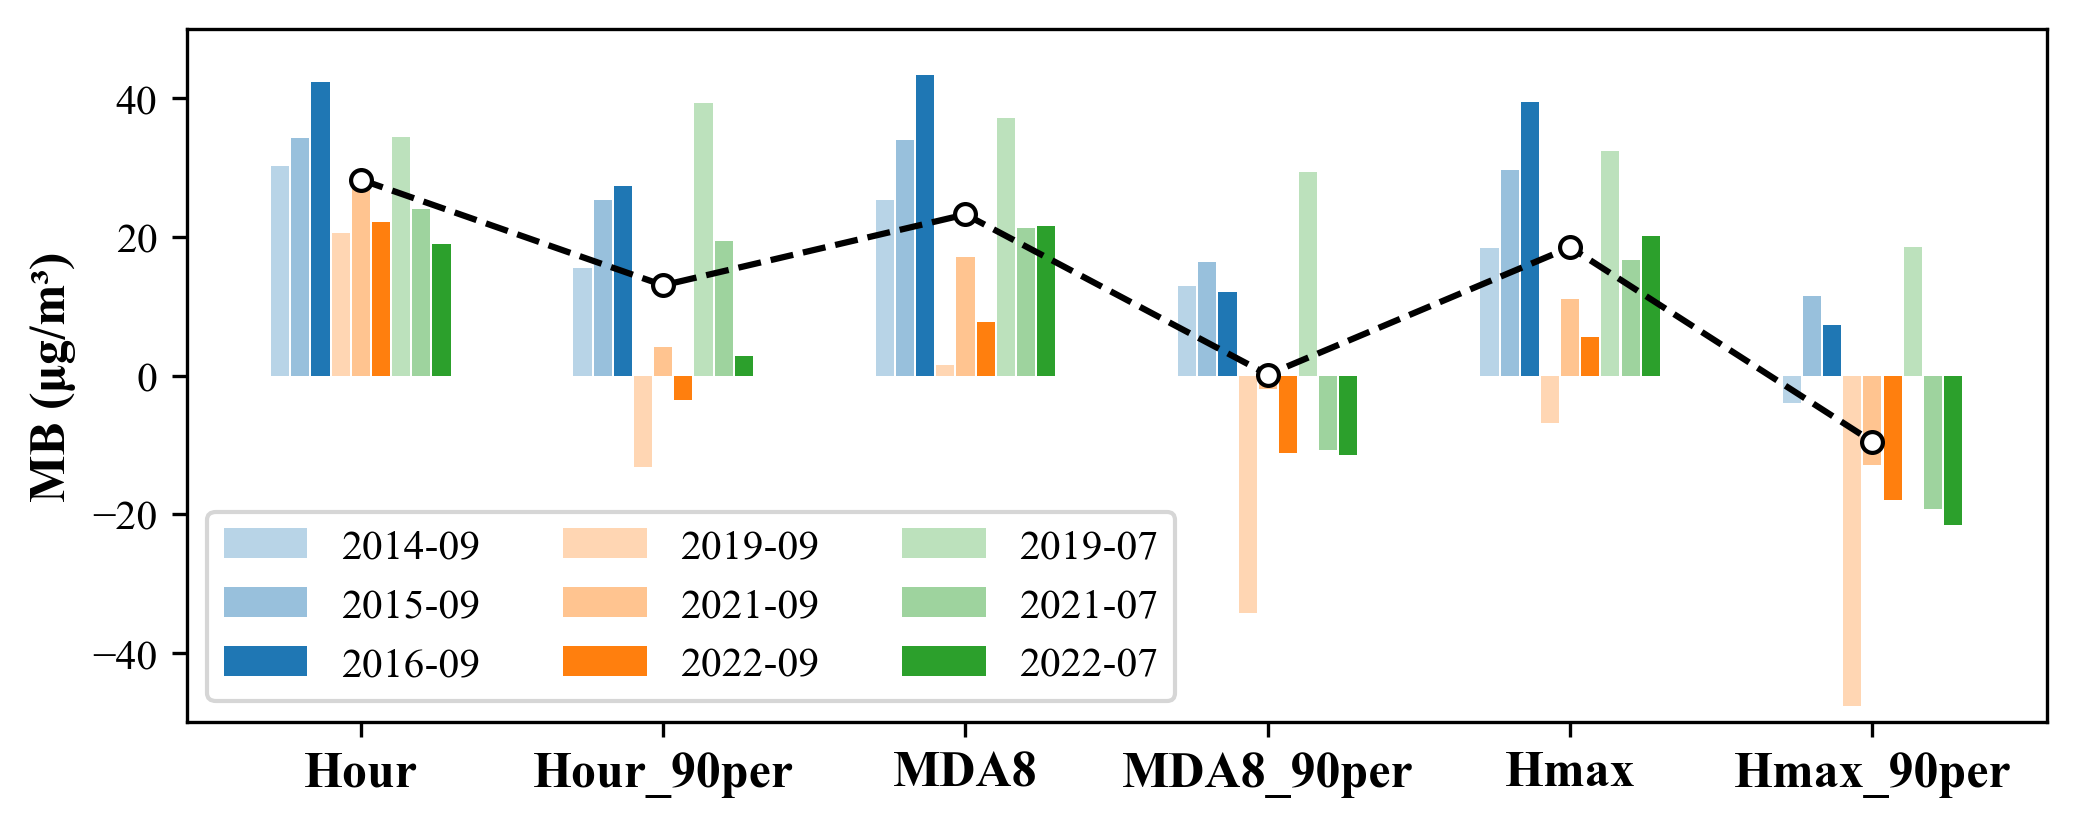

In [62]:
fontdict = dict(fontsize=12,fontweight='bold')
index = ['Hour','Hour_90per','MDA8','MDA8_90per','Hmax','Hmax_90per']

colors = ['#1f77b450','#1f77b475','#1f77b4',
          '#ff7f0e50','#ff7f0e75','#ff7f0e',
          '#2ca02c50','#2ca02c75','#2ca02c',]
labels = ['2014-09','2015-09','2016-09',
          '2019-09','2021-09','2022-09',
          '2019-07','2021-07','2022-07',]

fig = plt.figure(figsize=(8, 3),dpi=300)
ax = fig.subplots(1, 1)

groupwidth = 15
barwidth = 0.9
xloc = np.arange(len(mb_hour.index))
ax.bar(xloc, mb_hour, width=barwidth, label=labels,color=colors)
ax.bar(xloc+groupwidth, mb_hour90, width=barwidth, label=labels,color=colors)
ax.bar(xloc+groupwidth*2, mb_mda8, width=barwidth, label=labels,color=colors)
ax.bar(xloc+groupwidth*3, mb_mda890, width=barwidth, label=labels,color=colors)
ax.bar(xloc+groupwidth*4, mb_hmax, width=barwidth, label=labels,color=colors)
ax.bar(xloc+groupwidth*5, mb_hmax90, width=barwidth, label=labels,color=colors)

ticks = [np.mean(xloc),np.mean(xloc+groupwidth),np.mean(xloc+groupwidth*2),
         np.mean(xloc+groupwidth*3),np.mean(xloc+groupwidth*4),np.mean(xloc+groupwidth*5)]
ax.set_xticks(ticks)
ax.set_xticklabels(index,**fontdict)

ax.set_ylim(-50,50)
ax.set_ylabel('MB (μg/m³)',**fontdict)
ax.legend(labels,loc=3,ncol=3)

# ===========================

ydata = [mb_hour.mean(),mb_hour90.mean(),
         mb_mda8.mean(),mb_mda890.mean(),
         mb_hmax.mean(),mb_hmax90.mean()]
ax.plot(ticks,ydata,color='k',linestyle='--',
        linewidth=1.5,marker='o',markersize=5,markerfacecolor='w')

plt.show()